In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
path= "dataset.csv"

In [62]:
df = pd.read_csv(path)
df['date'] = pd.to_datetime(df['date'],dayfirst=True)

In [17]:
df.head()

,country,date,sector,value,timestamp
0,Brazil,2019-01-01,Power,0.096799,1546300800
1,China,2019-01-01,Power,14.816100,1546300800
2,EU27 & UK,2019-01-01,Power,1.886490,1546300800
3,France,2019-01-01,Power,0.051217,1546300800
4,Germany,2019-01-01,Power,0.315002,1546300800


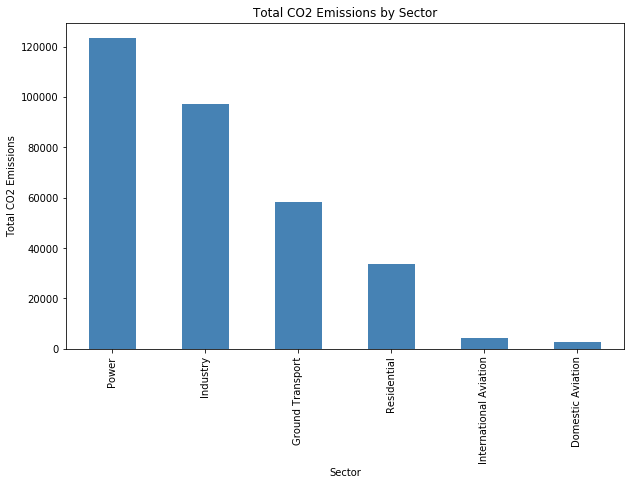

In [18]:
total_emissions_by_sector = df.groupby('sector')['value'].sum().sort_values(ascending=False)

# Plot total CO2 emissions by sector
plt.figure(figsize=(10, 6))
total_emissions_by_sector.plot(kind='bar', color='steelblue')
plt.title('Total CO2 Emissions by Sector')
plt.xlabel('Sector')
plt.ylabel('Total CO2 Emissions')
plt.show()

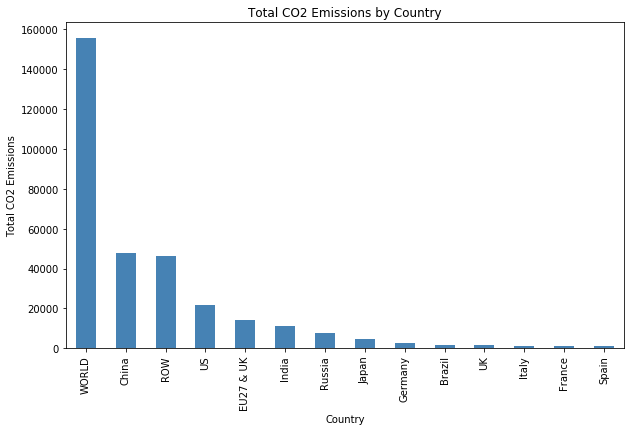

In [19]:
total_emissions_by_country = df.groupby('country')['value'].sum().sort_values(ascending=False)

# Plot total CO2 emissions by sector
plt.figure(figsize=(10, 6))
total_emissions_by_country.plot(kind='bar', color='steelblue')
plt.title('Total CO2 Emissions by Country')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions')
plt.show()

In [24]:
df_world = df[df['country']=='WORLD']

In [25]:
df_world = df_world.groupby('date').sum(numeric_only=True)['value'].reset_index() #Group by date
df_world = df_world.sort_values(by='date') #Sort values by date

# Extract year from each data point
df_world['Year'] = df_world['date'].dt.year

In [26]:
df_world

,date,value,Year
0,2019-01-01,97.141047,2019
1,2019-01-02,103.160961,2019
2,2019-01-03,105.631020,2019
3,2019-01-04,106.902631,2019
4,2019-01-05,102.685335,2019
...,...,...,...
1607,2023-05-27,91.023892,2023
1608,2023-05-28,87.063033,2023
1609,2023-05-29,89.986660,2023
1610,2023-05-30,94.550309,2023


In [32]:
df_world_2019 = df_world[df_world['Year'] == 2019]
df_world_2020 = df_world[df_world['Year'] == 2020]
df_world_2021 = df_world[df_world['Year'] == 2021]
df_world_2022 = df_world[df_world['Year'] == 2022]
df_world_2023 = df_world[df_world['Year'] == 2023]

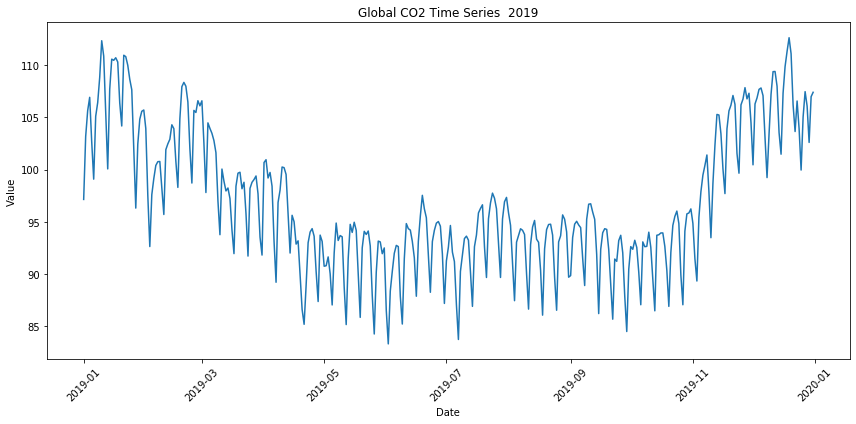

In [35]:
plt.figure(figsize=(12, 6)) 

plt.plot(df_world_2019['date'], df_world_2019['value'], linestyle='-')  # date as x axis ，co2 emissions as y axis
plt.title('Global CO2 Time Series  2019')  # title
plt.xlabel('Date')  # x - axis title
plt.ylabel('Value')  # y-axis title

plt.xticks(rotation=45) 

plt.tight_layout()  
plt.show() 

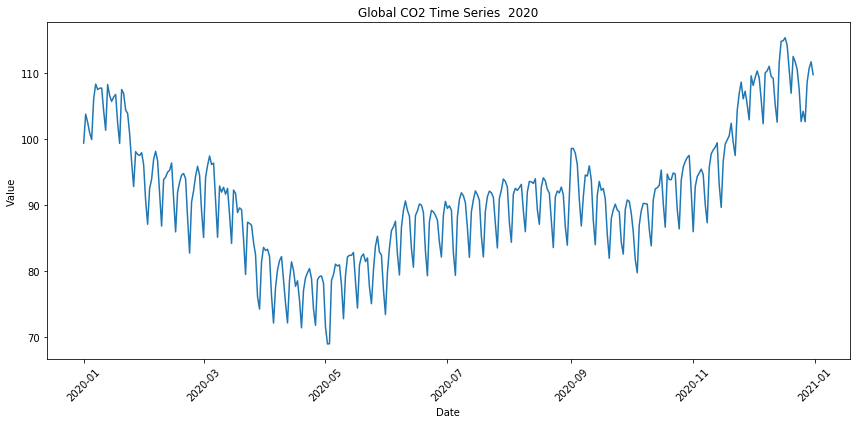

In [36]:
plt.figure(figsize=(12, 6)) 

plt.plot(df_world_2020['date'], df_world_2020['value'], linestyle='-')  # date as x axis ，co2 emissions as y axis
plt.title('Global CO2 Time Series  2020')  # title
plt.xlabel('Date')  # x - axis title
plt.ylabel('Value')  # y-axis title

plt.xticks(rotation=45) 

plt.tight_layout()  
plt.show() 

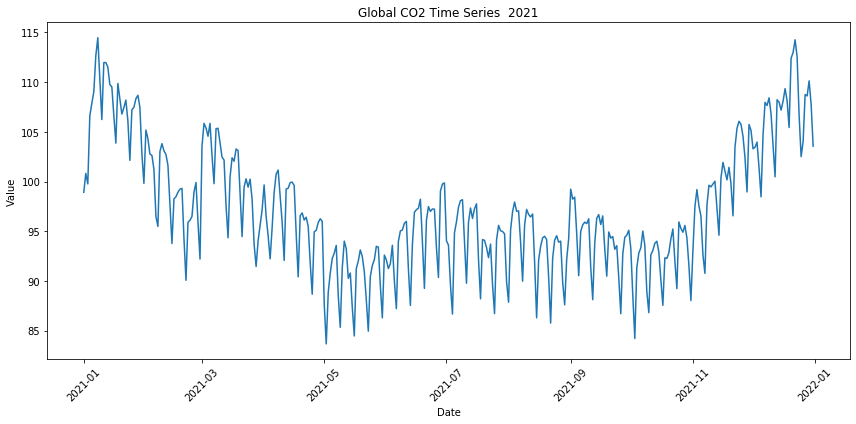

In [37]:
plt.figure(figsize=(12, 6)) 

plt.plot(df_world_2021['date'], df_world_2021['value'], linestyle='-')  # date as x axis ，co2 emissions as y axis
plt.title('Global CO2 Time Series  2021')  # title
plt.xlabel('Date')  # x - axis title
plt.ylabel('Value')  # y-axis title

plt.xticks(rotation=45) 

plt.tight_layout()  
plt.show() 

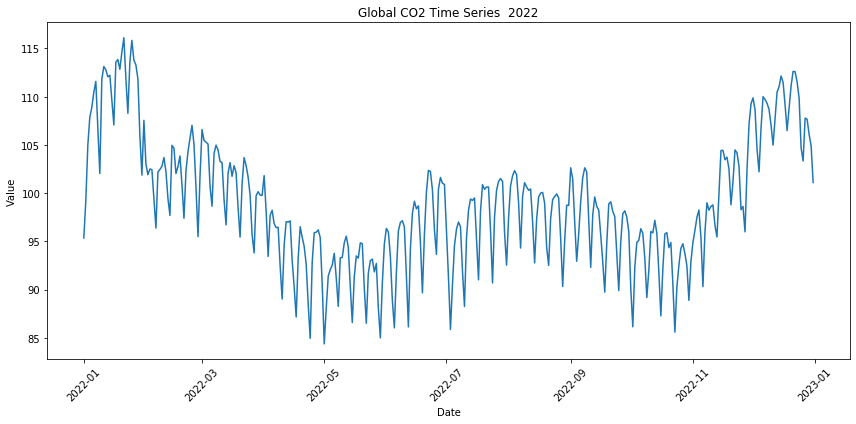

In [38]:
plt.figure(figsize=(12, 6)) 

plt.plot(df_world_2022['date'], df_world_2022['value'], linestyle='-')  # date as x axis ，co2 emissions as y axis
plt.title('Global CO2 Time Series  2022')  # title
plt.xlabel('Date')  # x - axis title
plt.ylabel('Value')  # y-axis title

plt.xticks(rotation=45) 

plt.tight_layout()  
plt.show() 

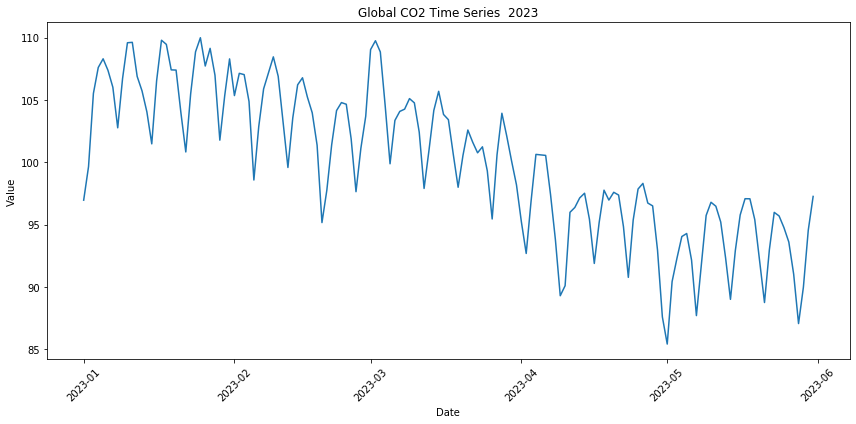

In [39]:
plt.figure(figsize=(12, 6)) 

plt.plot(df_world_2023['date'], df_world_2023['value'], linestyle='-')  # date as x axis ，co2 emissions as y axis
plt.title('Global CO2 Time Series  2023')  # title
plt.xlabel('Date')  # x - axis title
plt.ylabel('Value')  # y-axis title

plt.xticks(rotation=45) 

plt.tight_layout()  
plt.show() 

In [42]:
df_country = df.groupby(['date','country']).sum(numeric_only=True)['value'].reset_index()
df_country = df_country.sort_values(by='date')
df_country['Year'] = df_country['date'].dt.year

In [43]:
#df_country = df_country.groupby(['Year','country']).sum(numeric_only=True)['value'].reset_index()
df_country

,date,country,value,Year
0,2019-01-01,Brazil,0.661651,2019
13,2019-01-01,WORLD,97.141047,2019
12,2019-01-01,US,13.351452,2019
11,2019-01-01,UK,0.901544,2019
10,2019-01-01,Spain,0.667477,2019
...,...,...,...,...
22555,2023-05-31,China,31.057796,2023
22554,2023-05-31,Brazil,1.160636,2023
22566,2023-05-31,US,13.481231,2023
22559,2023-05-31,India,7.947358,2023


In [55]:
def plot_country_co2_emissions(country):
    df = df_country[df_country['country']==country]
    plt.figure(figsize=(12, 6))  

    
    for year in df['Year'].unique():
        subset = df[df['Year'] == year]  
        plt.plot(subset['date'], subset['value'], label=f'Year {year}', linestyle='-')  

    # 设置图表标题和轴标签
    plt.title('Value Over Time by Year'+'_' +country)
    plt.xlabel('Date')
    plt.ylabel('CO2 emissions')

    plt.grid(True)  
    plt.legend()  
    plt.xticks(rotation=45)  

    plt.tight_layout() 
    plt.show()  

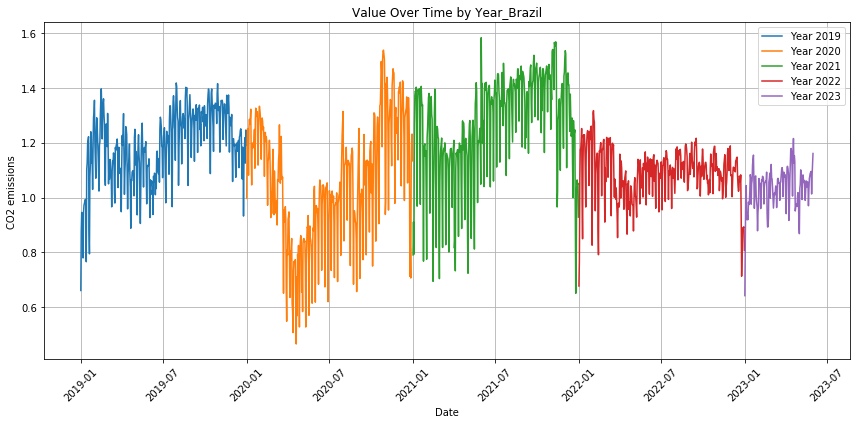

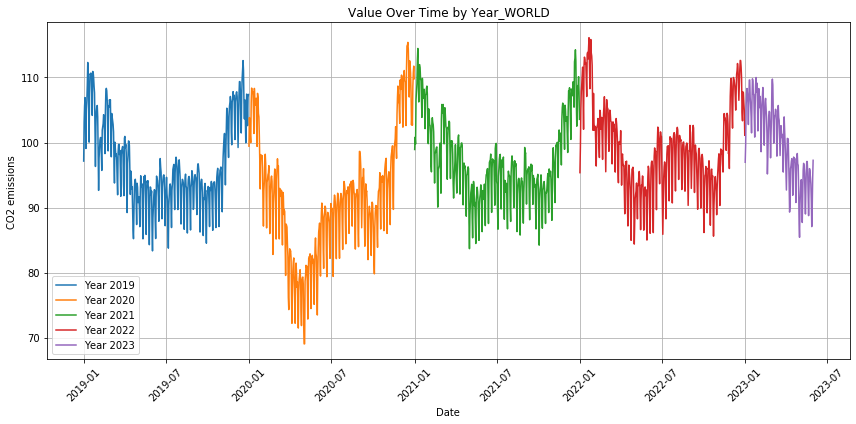

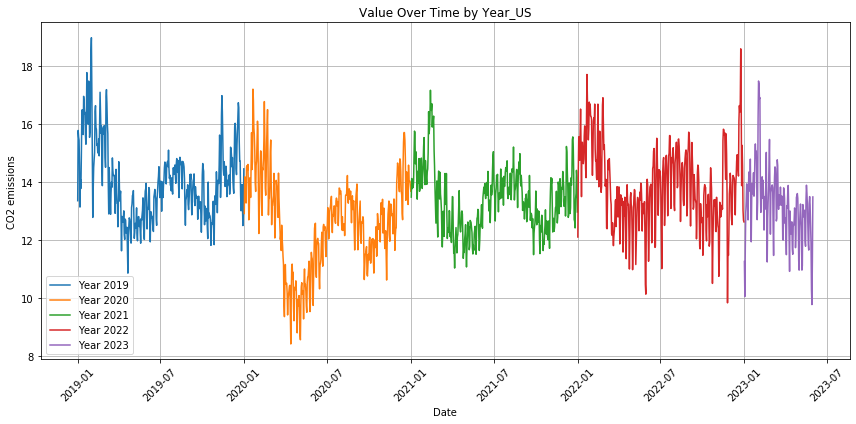

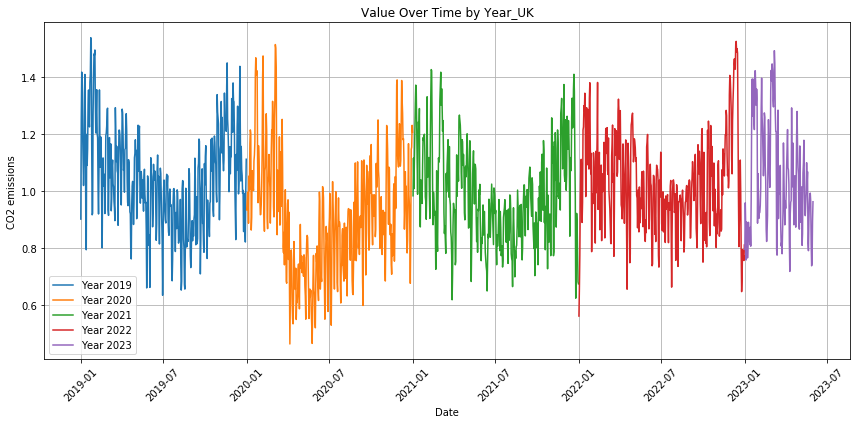

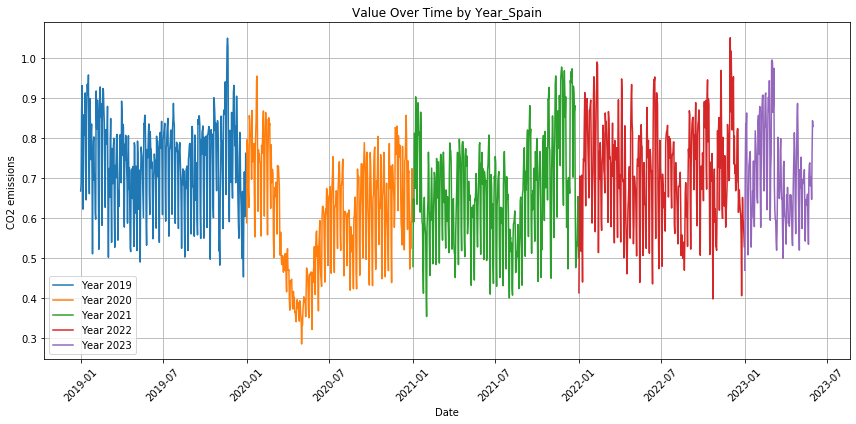

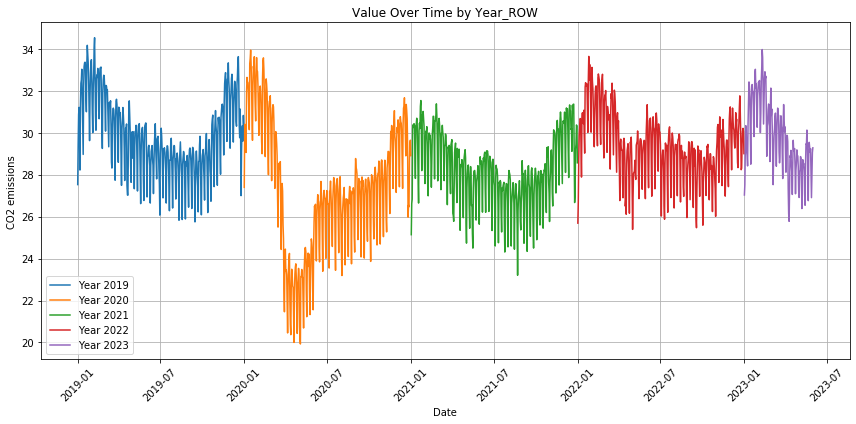

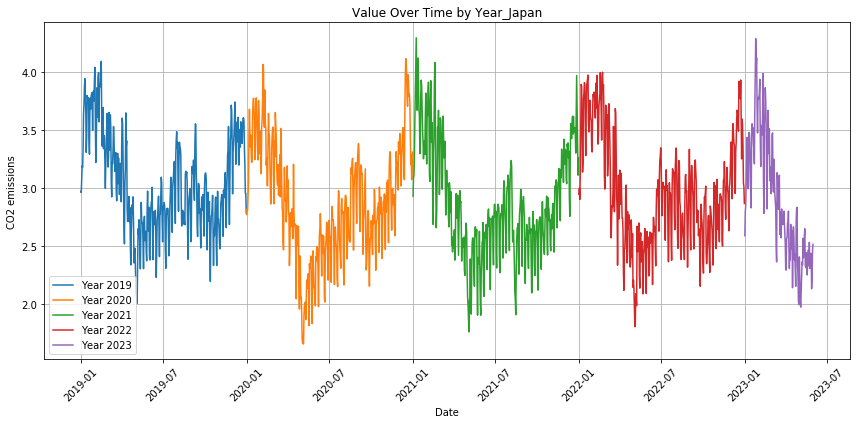

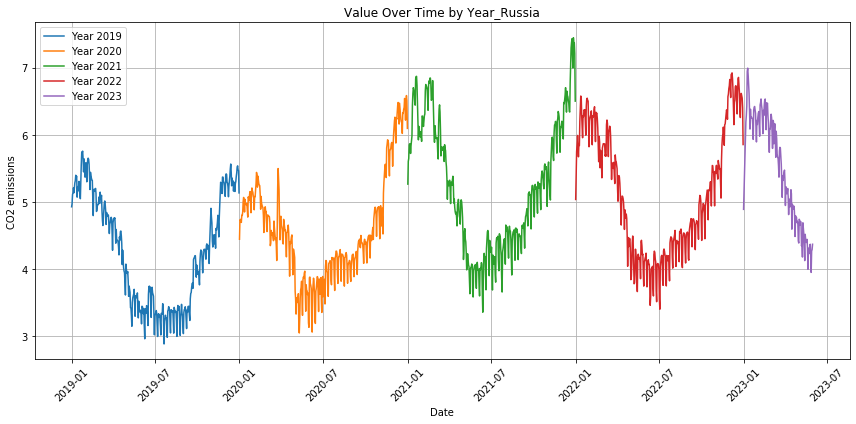

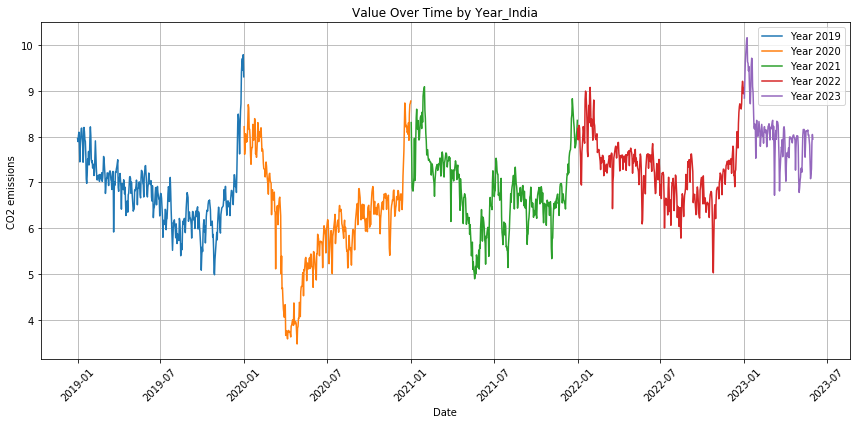

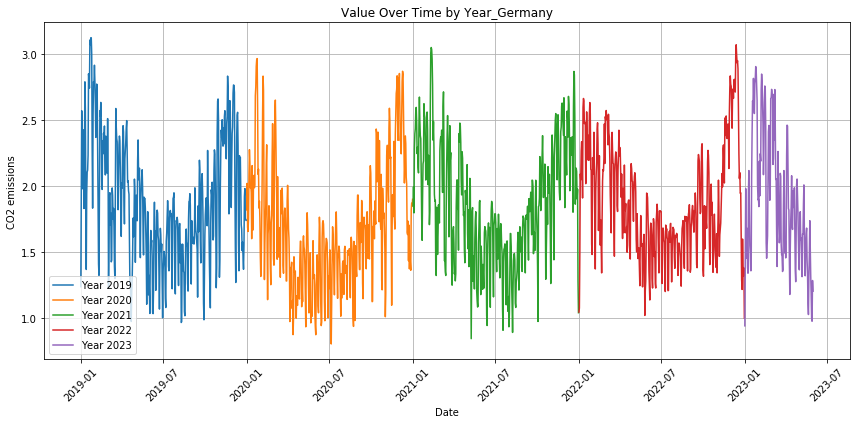

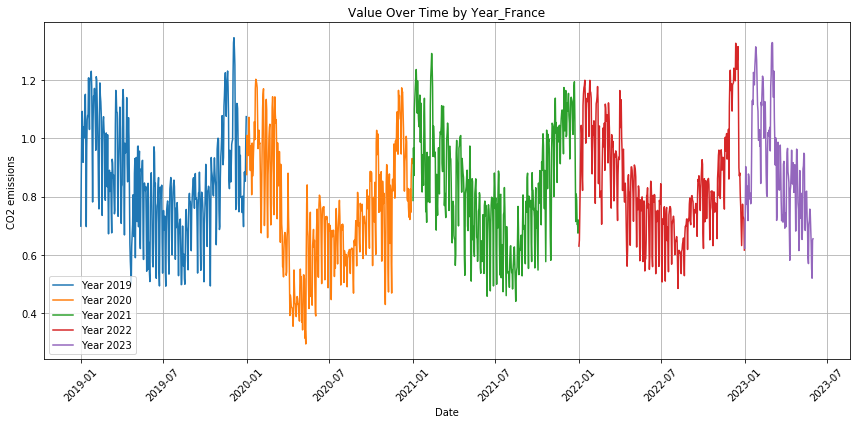

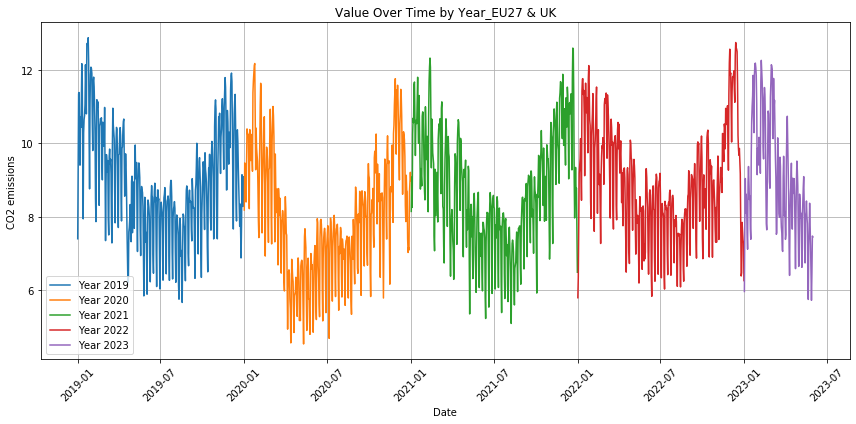

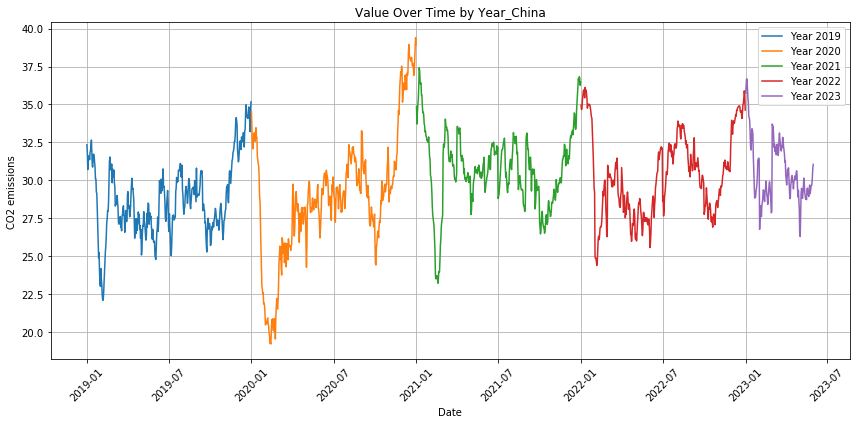

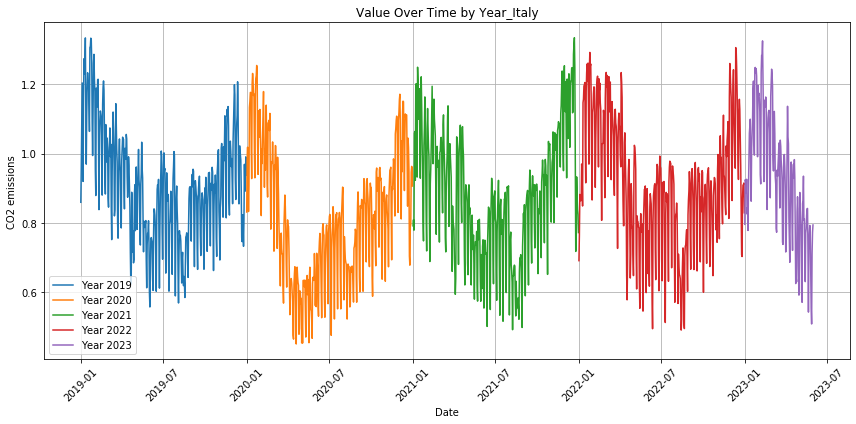

In [56]:
for country in df_country['country'].unique():
    plot_country_co2_emissions(country)

In [67]:
df_sec = df.groupby(['date','country','sector']).sum(numeric_only=True)['value'].reset_index() #Group by date
df_sec = df_sec.sort_values(by='date') #Sort values by date

# Extract year from each data point
df_sec['Year'] = df_sec['date'].dt.year

In [68]:
df_sec

,date,country,sector,value,Year
0,2019-01-01,Brazil,Domestic Aviation,0.023750,2019
60,2019-01-01,Spain,Domestic Aviation,0.013443,2019
59,2019-01-01,Russia,Residential,0.900577,2019
58,2019-01-01,Russia,Power,2.846680,2019
57,2019-01-01,Russia,International Aviation,0.026460,2019
...,...,...,...,...,...
135347,2023-05-31,France,Residential,0.087704,2023
135346,2023-05-31,France,Power,0.023154,2023
135344,2023-05-31,France,Industry,0.126641,2023
135353,2023-05-31,Germany,Residential,0.115647,2023


In [58]:
import plotly.express as px

In [81]:
co2_emissions_by_country = df.groupby(['country','sector']).sum(numeric_only=True)['value'].reset_index()
co2_emissions_by_country = co2_emissions_by_country[~co2_emissions_by_country['country'].isin(['WORLD'])]

# Create a faceted bar chart using Plotly Express
fig = px.bar(co2_emissions_by_country, x='country', y='value', color='sector', barmode='group',
             title="CO2 Emission by country & sector since 2019",
             labels={'value': 'CO2 Emissions (MtCO2/day)', 'country': 'Country','sector':'Sector'})

# Display the graph
fig.show()

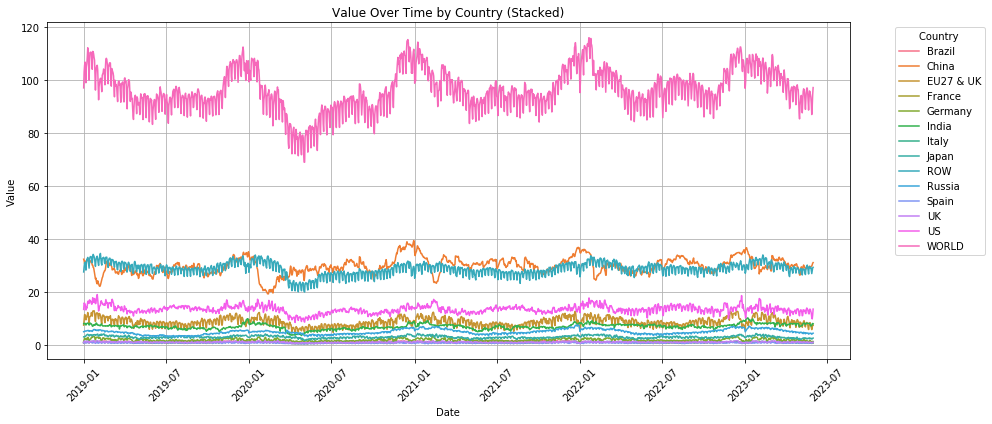

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


pivot_df = df.pivot_table(index='date', columns=['country'], values='value', aggfunc='sum')

# 创建堆叠折线图
plt.figure(figsize=(12, 6))  # 设置图形大小

# 绘制堆叠折线图
sns.lineplot(data=pivot_df, dashes=False)

plt.title('Value Over Time by Country (Stacked)')
plt.xlabel('Date')
plt.ylabel('Value')

plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.legend(title='Country ', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


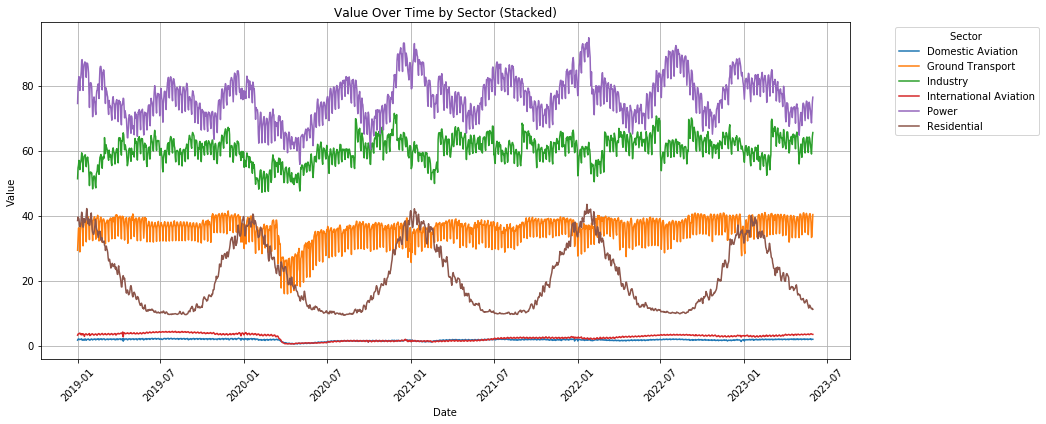

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


pivot_df = df.pivot_table(index='date', columns=['sector'], values='value', aggfunc='sum')

# 创建堆叠折线图
plt.figure(figsize=(12, 6))  # 设置图形大小

# 绘制堆叠折线图
sns.lineplot(data=pivot_df, dashes=False)

plt.title('Value Over Time by Sector (Stacked)')
plt.xlabel('Date')
plt.ylabel('Value')

plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.legend(title='Sector ', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()